# Section 2, project 1

##### Angélica María Narváez Vias
##### Catalina Jaramillo Villalba

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C://Users//cataj//Google Drive//Doctorado//Machine learning//Project 1//imageMNIST.csv', header=None)
data2 = pd.read_csv('C://Users//cataj//Google Drive//Doctorado//Machine learning//Project 1//labelMNIST.csv', header=None)

C:\Users\cataj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (2,3,4,5,6,7,8,9,15,16,17,18,20,21,22,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360,379,381,394,395,396,397,398) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# to replace , by . in data file 
data = data.replace( ','  , '.' , regex=True)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Multiclass classification

#### Hipotheses function $h_\theta (\theta^T X)=\frac{1}{1+e^{\theta^TX}}$

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

#### Cost function 

In [6]:
def computeCost(X,y,theta):
    m = len(X)
    h = sigmoid(X.dot(theta))
    J = (-1/(m))*np.sum((y*np.log(h))+(1-y)*np.log(1-h))
    return J

In [7]:
X = data.values.astype(np.float64)
y = data2.values

m = X.shape[0]
n = X.shape[1]
X = np.append(np.ones([m,1]),X, axis=1)

In [8]:
# Type of clases
classes = data2[0].unique()

# Create a matrix according to the class: C_ij=1 if element i belongs to clase j, C_ij= 0 otherwise 
classesMatrix = np.zeros([m,len(classes)])
for i in range(m):
    classesMatrix[i,y[i][0]-1]=1

In [9]:
def gradientDescent(X,ys,theta,alpha,n_iter):
    m = len(X)
    thetas= []
    Js = []
    
    for k in range(len(classes)):
        J_history = []
        for i in range(n_iter):
            y = classesMatrix[:,k].reshape(m,1)
            h = sigmoid(X.dot(theta))
            theta = theta - (alpha/m)*(np.dot(X.T,(h-y)))
            J_history.append(computeCost(X,y,theta))            
        Js.append(J_history)
        thetas.append(theta)    
    return(Js, thetas)

In [10]:
# Initial theta
theta = np.zeros([n+1,1])
#number of iterations
n_iter = 1500
alpha = 2
J_history, new_theta = gradientDescent(X,y, theta, alpha, n_iter)

In [11]:
# To get the matrix from vector
def Matrix(X):
    n = len(X)
    numberM = np.zeros([20,20])
    for i in range(20):
        numberM[i,:] = X[20*i:20*(i+1)]
    return numberM

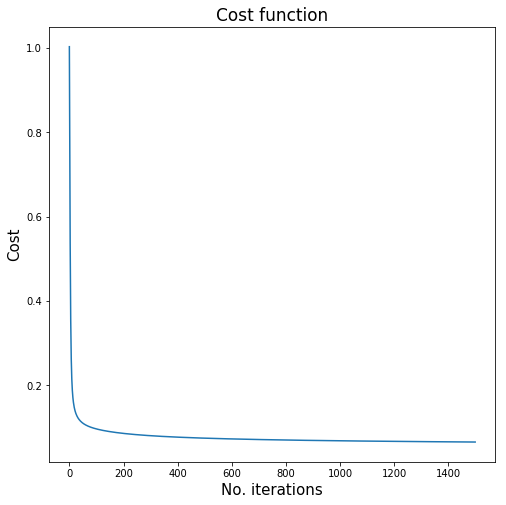

In [25]:
plt.plot(range(len(J_history[2])),J_history[2])
plt.xlabel('No. iterations',size=15)
plt.ylabel('Cost',size=15)
plt.title('Cost function',size=17)
plt.show()

In [13]:
def prediction(X, new_theta):
    n = len(new_theta)
    m = len(X)
    pred = []
    for i in range(n):
        theta = new_theta[i].reshape([m,1])
        pred.append(sigmoid(np.dot(X, theta)))
    j=pred.index(max(pred))
    if j<9:
        return classes[j+1]
    else:
        return 0

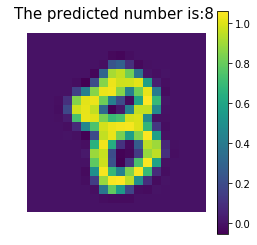

In [14]:
# Number of element i to predict (i between 1 and 5000)

i = 4400
v = prediction(X[i,:],new_theta)
Rematrix= Matrix(X[i,1:])
plt.matshow(Rematrix.T);
plt.colorbar()
plt.title('The predicted number is:%i '%v,size = 15)
plt.axis('off')
plt.show()

In [15]:
# Vector of predicted numbers

def vectorPrediction(X,new_theta):
    m = len(X)
    v = []
    for i in range(m):
        v.append(prediction(X[i,:],new_theta))
    return v
        

In [16]:
def confusionMatrix(pred,y):
    M = np.zeros([10,10])
    m = len(y)
    for i in range(m):
        #print(y[i][0])
        if y[i][0] == 10:
            #print(y[i])
            M[0,pred[i]] = M[0,pred[i]]+1
        else:
            M[y[i][0],pred[i]] = M[y[i][0],pred[i]]+1
    return M

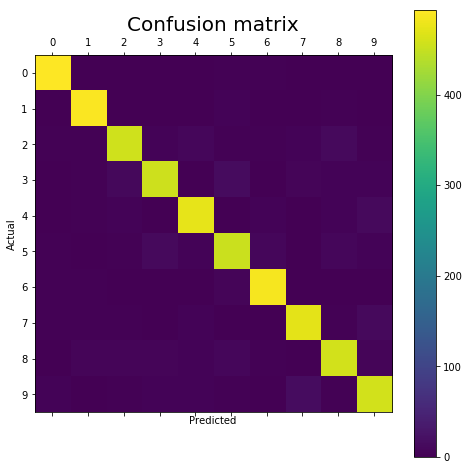

In [17]:
# The position i,j means: Actual value i predicted as j

pred = vectorPrediction(X,new_theta)
M = confusionMatrix(pred,y)

plt.rc('figure', figsize=(8, 8))
plt.matshow(M);
plt.colorbar()
plt.title('Confusion matrix',size=20)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks(range(0,10))
plt.yticks(range(0,10))
plt.show()

In [18]:
print('The percentage of well-predicted data is {}%'.format(100*np.trace(M)/m))

The percentage of well-predicted data is 94.06%


#### Wrong prediction cases

In [19]:
def wrongPred(pred,y):
    m = len(y)
    values = pd.DataFrame()
    for i in range(m):
        if (pred[i]-y[i])==0:
            pass
        else:
            if y[i]==10 and pred[i]==0:
                pass
            else:
                values = values.append(pd.DataFrame({'Indice':i,'Número real':y[i],'Número predito':pred[i]}))   
    values.index = range(1,len(values)+1)
    return values

df = wrongPred(pred,y)
df

,Indice,Número real,Número predito
1,101,10,5
2,103,10,5
3,112,10,3
4,142,10,8
5,265,10,4
6,286,10,6
7,392,10,6
8,521,1,5
9,531,1,5
10,561,1,5


In [20]:
#print(df.to_latex(index=False))

## Regularized multiclass classification

In [21]:
def computeCostReg(X,y,theta,lambdas):
    m = len(X)
    h = sigmoid(X.dot(theta))
    J = (-1/(m))*np.sum((y*np.log(h))+(1-y)*np.log(1-h))+(lambdas/(2*m))*np.sum(new_theta[1][1:n+1])
    return J

In [22]:
def gradientDescentReg(X,ys,theta,alpha,n_iter,lambdas):
    m = len(X)
    thetas= []
    Js = []
    
    for k in range(len(classes)):
        J_history = []
        for i in range(n_iter):
            theta_aux = theta
            theta_aux[0] = 0
            y = classesMatrix[:,k].reshape(m,1)
            h = sigmoid(X.dot(theta))
            theta = theta - (alpha/m)*(np.dot(X.T,(h-y)))-(alpha*lambdas/m)*theta_aux
            J_history.append(computeCostReg(X,y,theta,lambdas))            
        Js.append(J_history)
        thetas.append(theta)    
    return(Js, thetas)

In [23]:
# Initial theta
theta = np.zeros([n+1,1])
#number of iterations
n_iter = 1500
alpha = 2
lambdas = 10
J_historyReg, new_thetaReg = gradientDescentReg(X,y, theta, alpha, n_iter,lambdas)

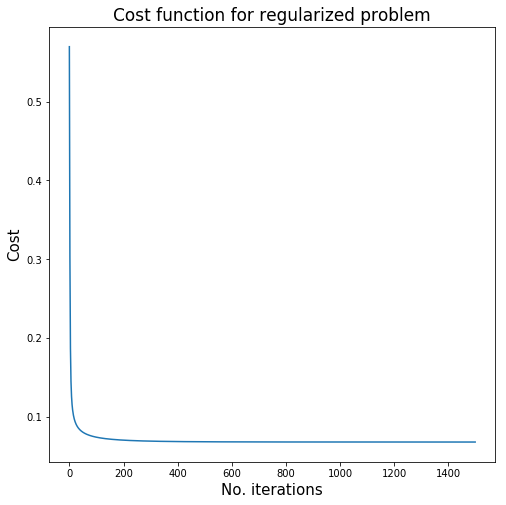

In [26]:
plt.plot(range(len(J_historyReg[2])),J_historyReg[2])
plt.xlabel('No. iterations',size=15)
plt.ylabel('Cost',size=15)
plt.title('Cost function for regularized problem',size=17)
plt.show()

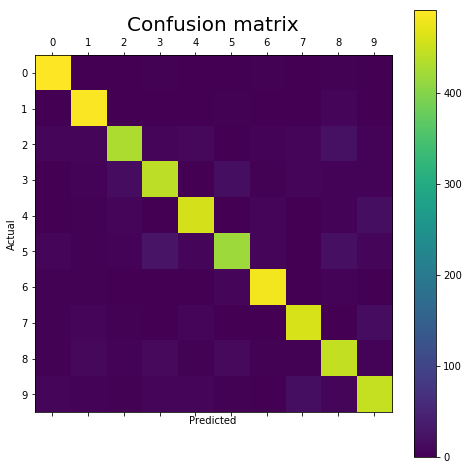

In [27]:
predR = vectorPrediction(X,new_thetaReg)
Mr = confusionMatrix(predR,y)

plt.rc('figure', figsize=(8, 8))
plt.matshow(Mr);
plt.colorbar()
plt.title('Confusion matrix',size=20)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks(range(0,10))
plt.yticks(range(0,10))
plt.show()

In [28]:
print('The percentage of well-predicted data is {}%'.format(100*np.trace(Mr)/m))

The percentage of well-predicted data is 91.34%


In [29]:
wrongPred(predR,y)

,Indice,Número real,Número predito
1,112,10,3
2,142,10,8
3,265,10,4
4,286,10,6
5,316,10,3
6,329,10,6
7,351,10,9
8,392,10,6
9,488,10,8
10,505,1,6


### Cost non-regularized vs regularized 

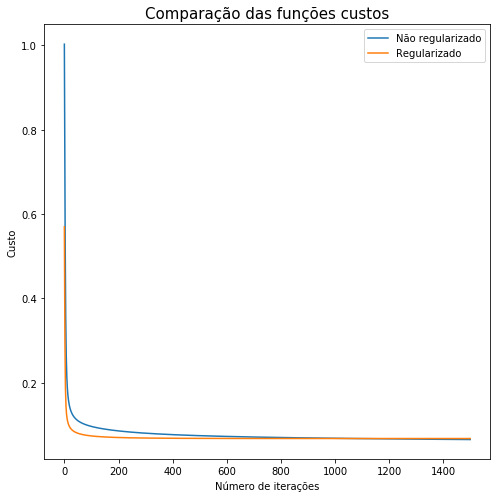

In [34]:
plt.plot(range(len(J_history[2])),J_history[2], label='Não regularizado')
plt.plot(range(len(J_historyReg[2])),J_historyReg[2], label='Regularizado')
plt.ylabel('Custo')
plt.xlabel('Número de iterações')
plt.title('Comparação das funções custos',size=15)
plt.legend(loc='best')
plt.show()